# project1 캘리포니아 주택가격 분석

## 1.데이터셋
+ scikit-learn에서는  1990년대 캘리포니아 지역에 주택 가격에 대한 데이터룰 제공함
+ 캘리포니아 주택가격에 영향을 미치는요인은 무엇인지 파악하고, 에측하는 회귀모델을 학습시키고자 함
+ 데이터셋은 20640개의 관측값과 8개의 독립변수(feature), 1개의 종속변수(target)으로 구성됨

## 2.데이터 확인 및 전처리

In [58]:
#라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#데이터 불러오기
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()

df.data  #feature
df.target  #target

In [8]:
#데이터 불러오기
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True)
df=data.frame
df.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521


In [9]:
#데이터확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


+ 캘리포니아 주택가격 데이터를 확인한 결과, 관측값은 20640개 변수는 9개로 나타남
+ 주택가격에 영향을 미치는 특성(feature)은 다음과 같음
  + MedInc	지역 중위 소득 (10,000 USD)
  + HouseAge	주택 연식 (건축 후 경과된 연도 수)
  + AveRooms	가구당 평균 방 개수
  + AveBedrms	가구당 평균 침실 개수
  + Population	지역 내 인구 수
  + AveOccup	가구당 평균 거주 인원 수
  + Latitude	위도
  + Longitude	경도
  + MedHouseVal	주택 중위 가격 (100,000 USD)
+ 종속변수(target)은 MedHouseVal(주택중위가격(100,000USD))임

In [11]:
#데이터 전처리 : 결측값 확인
#결측값은 없는것으로 나타남
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

## 3.학습데이터/평가데이터
 + 학습데이터와 평가데이터를 7:3비율로 분할함

In [28]:
a,b=[10,20]
print(a)
print(b)

10
20


In [73]:
##학습데이터와 평가데이터 분할 (7:3비율)
X=data.data     #feature
y=data.target   #target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)

In [74]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7061,4.1312,35.0,5.882353,0.975490,1218.0,2.985294,33.93,-118.02
14689,2.8631,20.0,4.401210,1.076613,999.0,2.014113,32.79,-117.09
17323,4.2026,24.0,5.617544,0.989474,731.0,2.564912,34.59,-120.14
10056,3.1094,14.0,5.869565,1.094203,302.0,2.188406,39.26,-121.00
15750,3.3068,52.0,4.801205,1.066265,1526.0,2.298193,37.77,-122.45
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [75]:
y_train

7061     1.93800
14689    1.69700
17323    2.59800
10056    1.36100
15750    5.00001
          ...   
11284    2.29200
11964    0.97800
5390     2.22100
860      2.83500
15795    3.25000
Name: MedHouseVal, Length: 14448, dtype: float64

In [76]:
data.target

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

## 4.데이터탐색

In [77]:
# 요약 통계량 확인
import pandas as pd
df_train = pd.concat([X_train, y_train], axis=1)
df_train.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,3.876892,28.575374,5.438125,1.098033,1427.927326,3.119236,35.650669,-119.584102,2.069240
std,1.904908,12.613634,2.453569,0.447498,1140.225190,12.373636,2.135742,2.002930,1.157492
min,0.499900,1.000000,0.888889,0.333333,3.000000,0.692308,32.550000,-124.350000,0.149990
25%,2.567225,18.000000,4.448928,1.006783,791.000000,2.430380,33.940000,-121.800000,1.193000
50%,3.539100,29.000000,5.232422,1.049492,1168.000000,2.817147,34.270000,-118.510000,1.793000
75%,4.758075,37.000000,6.060692,1.100328,1727.000000,3.279135,37.720000,-118.010000,2.646000
max,15.000100,52.000000,141.909091,25.636364,35682.000000,1243.333333,41.950000,-114.310000,5.000010


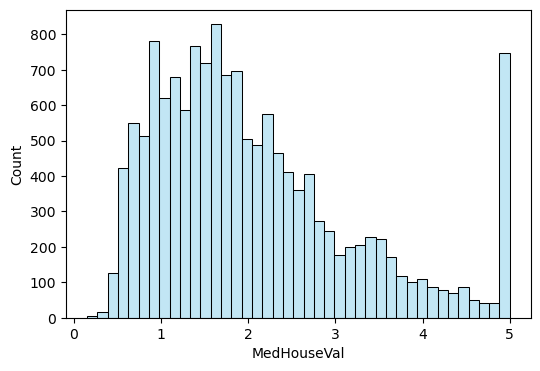

In [88]:
# 중위 주택 가격에 대한 분포
import seaborn as sns
plt.figure(figsize=(6,4))
sns.histplot(df_train['MedHouseVal'],color='skyblue', alpha=0.5)
plt.show()

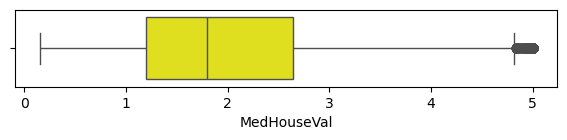

In [90]:
# 중위 주택 가격에 대한 분포
import seaborn as sns
plt.figure(figsize=(7,1))
sns.boxplot(x='MedHouseVal', data=df_train, color='yellow')
plt.show()

+ 표준편차는 11.5달러로 나타남
+ 중위 주택 가격의 최솟값은 1만 4천달러, 1사분위 수는 11만 9천 달러, 중간 값은 17만 9천 달러, 3사분위수는 26만 달러, 최댓값은 50만 달러로 분포함
+ 히스토그램과 상자그림을 살펴보면 중위 주택 가격이 매우 높은 이상값이 많이 존재함을 알 수 잇음

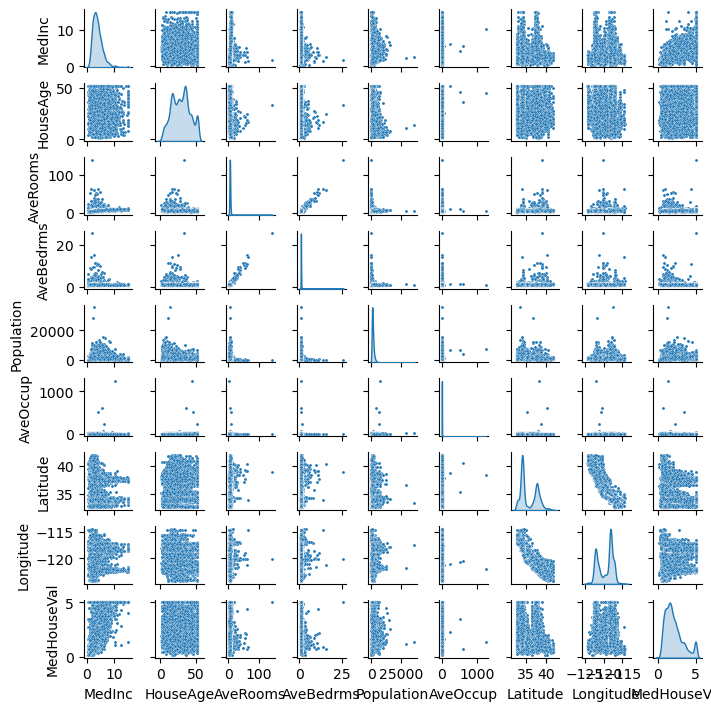

In [112]:
# 산점도
sns.pairplot(df_train, height=0.8, plot_kws={'s': 5}, diag_kind='kde')
plt.show()

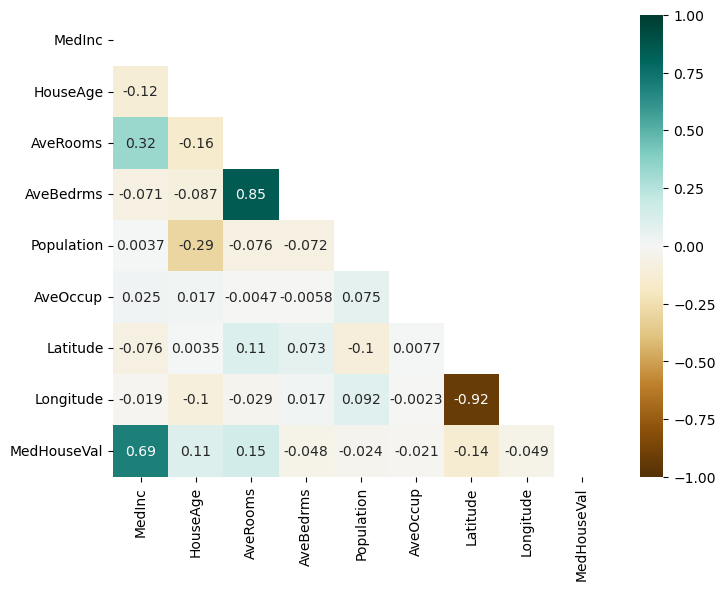

In [119]:
# 상관계수
corr_train=df_train.corr()
upp_mat=np.triu(corr_train)

plt.figure(figsize=(8,6))
sns.heatmap(corr_train, annot=True, mask=upp_mat, cmap='BrBG', vmin=-1, vmax=1)
plt.show()

+ 중위 주택 가격과의 상관관계를 살펴보면 지역 중위 소득과 강한 양의 상관관계가 존재함
+ 또한 주택 연식, 가구당 평균 방 개수, 위도(Latitude)간에도 약한 양의 상관관계가 있음
+ 따라서 중위주택 가격을 예측하는 특성(feature)으로 해당 변수를 선택함

## 5. 회귀모델 학습 및 평가

In [130]:
# 상관관계가 존재하는 특성9feature) 선택
features=['MedInc', 'HouseAge', 'AveRooms', 'Latitude']
X_train=df_train[features]    #2차원 배열

In [134]:
#선형 회귀모델을 생성 및 학습
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

#회귀계수(regression coefficient)
df_coef = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
print(df_coef)

    Feature  Coefficient
0    MedInc     0.435658
1  HouseAge     0.016937
2  AveRooms    -0.019505
3  Latitude    -0.045071


+ 특성(feature)이 중위주택가격(target)에 미치는 영향은 다음과 같음
  + 회귀계수를 살펴보면 중위 주택 가격은 지역 중위 소득이 1만 달러 증가할수록 중위 주택 가격은 4만 3천 달러 증가하는 것으로 나타남. 이는 경제적 여유가 있을수록 좋은 집에 거주하는 경향이 잇음을 보임
  + 주택 연식이 1년 증가하면 1693달러 증가는 것으로 나타남
  + 가구당 평균 방 개수가 1개 증가하면 중위주택 가격은 1950달러 감소함
  + 위도가 1도 증가하면 중위 주택 가격은 4507달러 감소하는 경향이 있음. 이는 일반적으로 캘리포니아 주는 남부 지역이 상대적으로 대도시가 많아 주택 가격이 더 높은 것을 반영하는 것으로 판단됨

In [133]:
# 평가 데이터에서도 훈련 데이터에서 사용한 독립변수만 선택
X_test=X_test[features]

#학습데이터로 학습한 회귀모델에 평가데이터를 입력해서 예측값 계산
y_pred = model.predict(X_test)

#평가데이터의 실제 관측값과 예측값을 비교하여 모델을 평가: RMES, 결정계수
from sklearn.metrics import mean_squared_error, r2_score
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
R2 = r2_score(y_test, y_pred)

print(f'RMSE : {RMSE:.3f}')
print(f'결정계수 : {R2:.3f}')

RMSE : 0.794
결정계수 : 0.520


+ RMSE는 0.794로, 주택 중위 가격의 실제값과 예측값이 평균적으로 약 8만 달러 차이가 있다는 것을 의미함
+ 학습데이터에서 주택 중위 가격의 평균은 약 20만 달러인 점을 고려하면, 모델의 평균 오차는 약 25% 수준임을 알 수 있음
+ 따라서 평균 오차가 비교적 큰 편이므로, 모델 성능 개선이 필요한 것으로 판단됨
+ 결정계수는 52.0%로 나타남

# project2 : 분꽃 분류

## 1. 데이터셋
+ seaborn에서는 붓꽃에 대한 데이터를 제공함
+ 붓꽃의 품종에 영향을 미치는 요인은 무엇인지 파악하고, 모델학습을 통해 품종을 예측하고자함

## 2. 데이터 확인 및 전처리

In [136]:
#라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [192]:
# 데이터 불러오기
df = sns.load_dataset('iris')
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [142]:
# 데이터 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [182]:
#데이터 전처리 : 결측값 확인
#영화장르를 특성으로 사용할 예정이므로 
#director, cast 변수에 존재하는 결측값은 별도로 처리하지 않음
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## 3. 학습데이터와 평가데이터로 분할
 + 학습데이터와 평가데이터를 8:2 비율로 분할

In [150]:
# 학습/평가 데이터 분할(8:2비율)
X=df.drop(columns='species')      # feature
y=df['species']                   # target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 데이터 탐색

In [193]:
# 요약 통계량 확인
X_train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,120.000000,120.000000,120.000000,120.000000
mean,5.809167,3.061667,3.726667,1.183333
std,0.823805,0.449123,1.752345,0.752289
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.500000,0.300000
50%,5.750000,3.000000,4.250000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,7.700000,4.400000,6.700000,2.500000


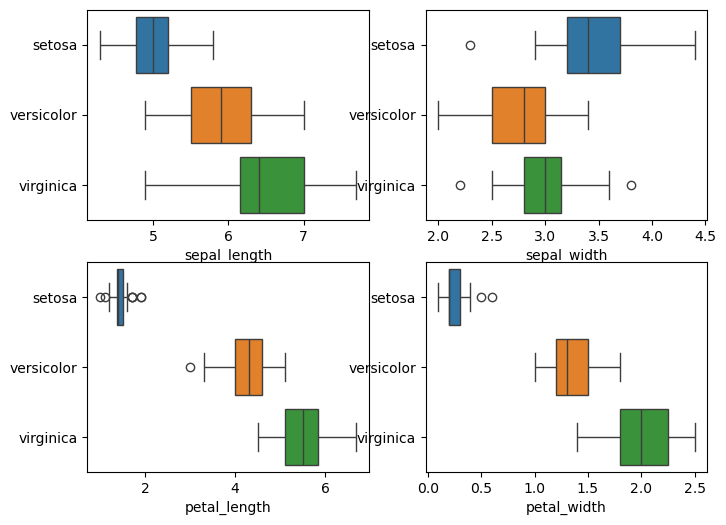

In [186]:
# 상자수염 그래프
df_train=pd.concat([X_train, y_train], axis=1)

plt.figure(figsize=(8,6))
for i, feature in enumerate(X_train.columns):
    plt.subplot(2,2,i+1)
    sns.boxplot(y='species', x=feature, hue='species', data=df_train)
    plt.ylabel('')
plt.show()

<Figure size 600x400 with 0 Axes>

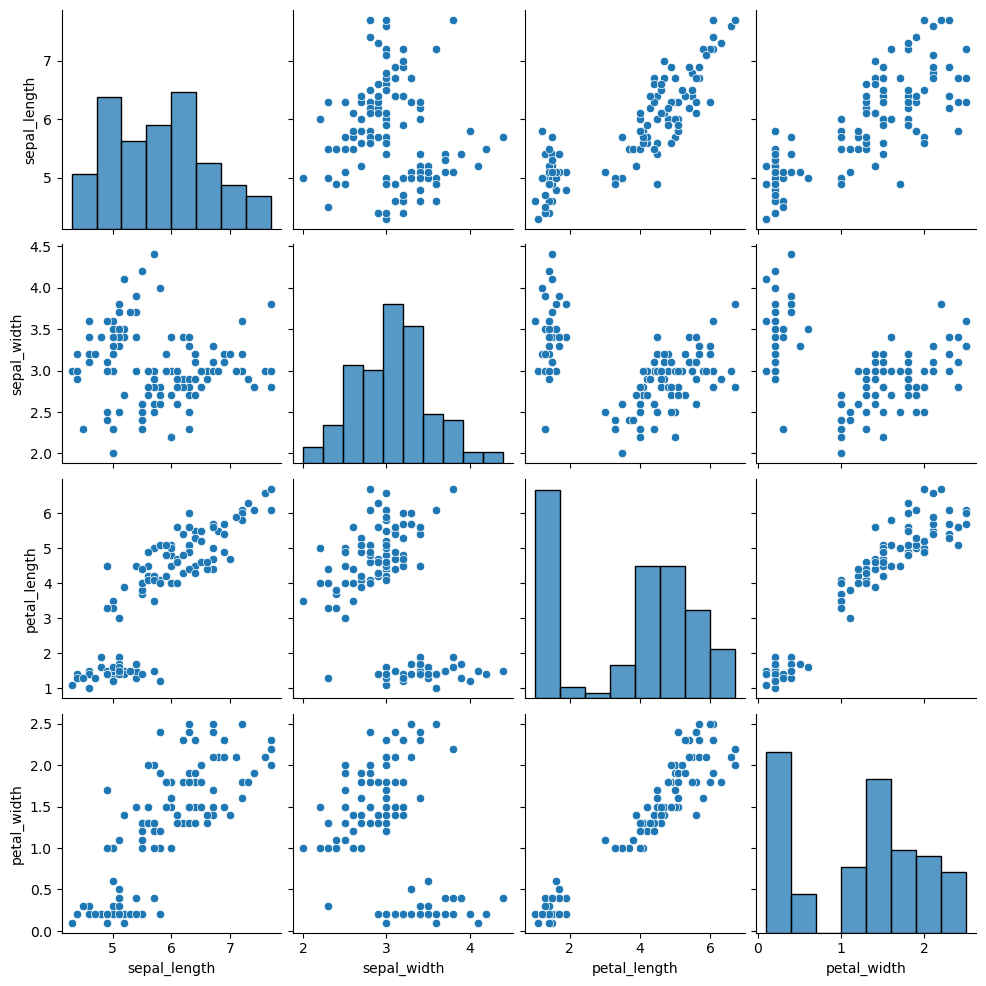

In [151]:
plt.figure(figsize=(6,4))


sns.pairplot(X_train)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

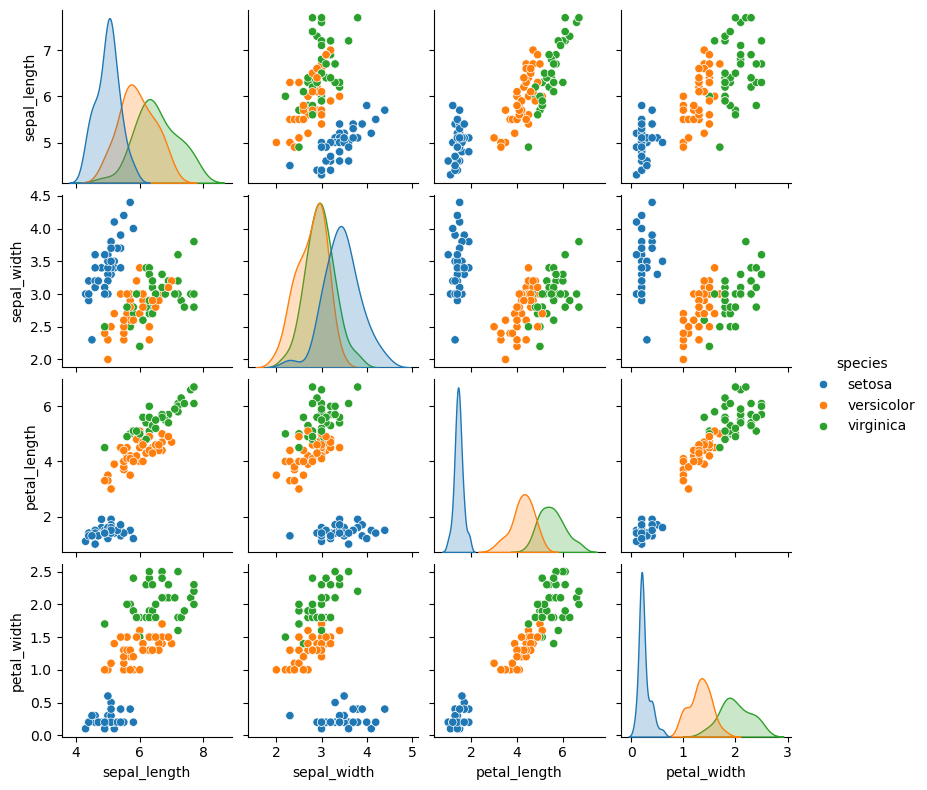

In [161]:
#산점도
sns.pairplot(df_train, hue='species', height=2)
plt.show

## 5.분류모델 학습

In [195]:
# 최적의 k 값 선택
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

k_range = range(1, 20, 2)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
    print(f'k={k}일 때 정확도 : {scores.mean():.3f}')

k=1일 때 정확도 : 0.950
k=3일 때 정확도 : 0.958
k=5일 때 정확도 : 0.942
k=7일 때 정확도 : 0.942
k=9일 때 정확도 : 0.933
k=11일 때 정확도 : 0.950
k=13일 때 정확도 : 0.942
k=15일 때 정확도 : 0.942
k=17일 때 정확도 : 0.942
k=19일 때 정확도 : 0.942


In [196]:
# 모델 성능이 가장 좋은 k 값 선택
best_k = k_range[k_scores.index(max(k_scores))]
print(f"최적의 k 값은 {best_k}이며, 평균 정확도는 {max(k_scores):.3f}")

최적의 k 값은 3이며, 평균 정확도는 0.958


In [197]:
# K-NN 분류모델 생성 및 학습
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

#학습데이터로 분류한 분류모델에 평가데이터를 입력하여 클래스 분류
y_pred = knn.predict(X_test)

# 분류모델 평가 : 정확도, 정밀도, 재현도
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')

print(f"정확도 : {accuracy:.3f}")
print(f"정밀도 : {precision:.3f}")
print(f"재현율 : {recall:.3f}")

정확도 : 1.000
정밀도 : 1.000
재현율 : 1.000


# 타이타닉 데이터 분석

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = sns.load_dataset('titanic')

## 1. 데이터 탐색 

In [9]:
# 데이터셋의 기본 정보를 확인합니다
df.info()

# 데이터셋의 상위 5개 행을 출력합니다
df.head()

# 기초 통계 정보 확인
df.describe()

# 결측치 확인
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## 2. 데이터 전처리

In [10]:
# 결측치 처리
df['age'].fillna(df['age'].mean(), inplace=True)  # 나이 평균값으로 대체
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)  # 승선 항구 최빈값으로 대체

# 'cabin', 'ticket', 'name' 열은 예측에 큰 영향을 미치지 않으므로 삭제
#df.drop(columns=['cabin', 'ticket', 'name'], inplace=True)

# 결측치 다시 확인
df.isnull().sum()


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_12656\1544689094.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)  # 나이 평균값으로 대체
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_12656\1544689094.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [11]:
# 성별을 숫자로 변환 (male: 0, female: 1)
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

# 승선 항구를 숫자로 변환 (C: 0, Q: 1, S: 2)
df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['age', 'fare']] = scaler.fit_transform(df[['age', 'fare']])

## 3. 예측 모델 학습

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# 특성 변수(X)와 타겟 변수(y) 설정
X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
y = df['survived']

# 훈련 세트와 테스트 세트로 분리 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression 모델 학습
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 정확도 및 혼동 행렬 출력
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7988826815642458
Confusion Matrix:
 [[88 17]
 [19 55]]


## 4. 변수 중요도 해석

In [14]:
# 모델의 회귀 계수 확인 (변수 중요도)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

# 중요도 순으로 정렬
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

print(feature_importance)


    Feature  Coefficient
1       sex     2.587206
5      fare     0.513029
4     parch    -0.084344
6  embarked    -0.247871
3     sibsp    -0.263686
0    pclass    -0.923115
2       age    -1.725817
